### 차원 축소, 특성 추출, 매니폴드 학습
#### 주성분 분석 (PCA)

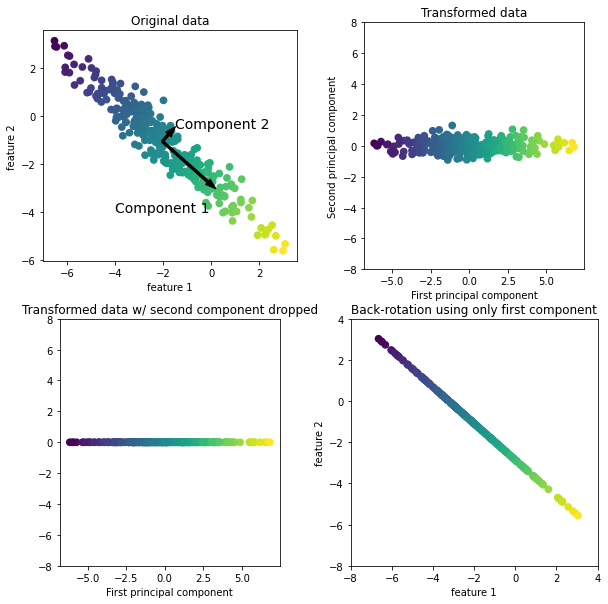

In [1]:
import mglearn

mglearn.plots.plot_pca_illustration()

* Component 1
    * 분산이 가장 큰 방향을 찾는다.
    * 데이터에서 가장 많은 정보를 담고 있는 방향.
    * 특성들의 상관관계가 가장 큰 방향.
* 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾는다.
* 이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서 **주성분 (principal component)** 라고 한다.
* 일반적으로 원본 특성 개수만큼의 주성분이 있다.

* PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있다.

* PCA를 적용해 유방암 데이터셋 시각화하기
    * PCA가 가장 널리 사용되는 본야 - 고차원 데이터셋의 시각화

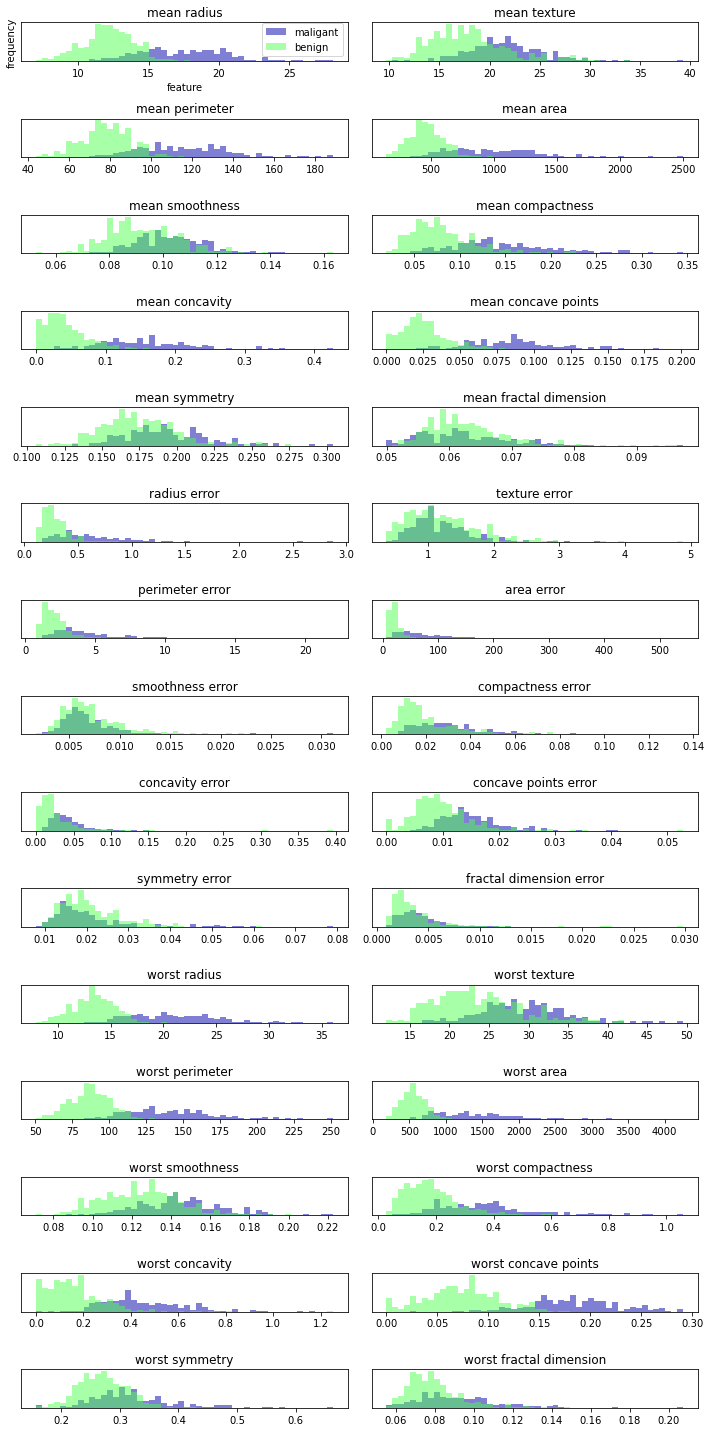

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
maligant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(maligant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('feature')
ax[0].set_ylabel('frequency')
ax[0].legend(['maligant', 'benign'], loc='best')
fig.tight_layout()

* PCA를 적용하기 전에 StandardScaler를 사용해 각 특성의 분산이 1이 되도록 스케일 조정.

In [4]:
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print('original data shape:', str(X_scaled.shape))
print('decomposed data shape:', str(X_pca.shape))

original data shape: (569, 30)
decomposed data shape: (569, 2)


Text(0, 0.5, 'second principal component')

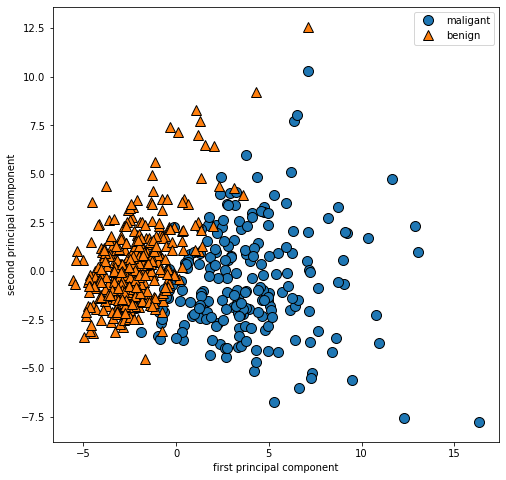

In [7]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['maligant', 'benign'], loc='best')
plt.xlabel('first principal component')
plt.ylabel('second principal component')

In [8]:
print('PCA principla components shape:', pca.components_.shape)

PCA principla shape: (2, 30)


In [9]:
print('PCA principal components:', pca.components_)

PCA principal components: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'principal component')

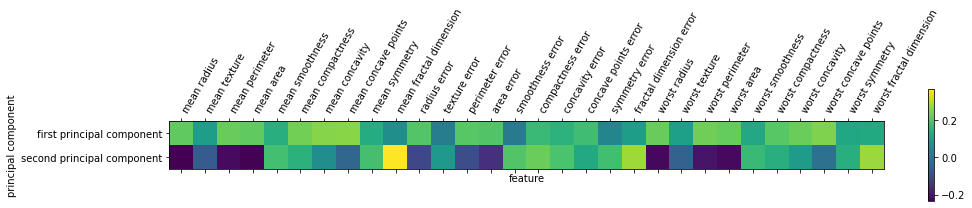

In [10]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['first principal component', 'second principal component'])
plt.colorbar()
plt.xticks(
    range(len(cancer.feature_names)),
    cancer.feature_names,
    rotation=60,
    ha='left'
)
plt.xlabel('feature')
plt.ylabel('principal component')

* 고유얼굴(eigenface) 특성 추출
    * PCA는 특성 추출에도 이용.
        * 원본 데이터 표현보다 분석하기에 더 적합한 표현을 잦을 수 있으리란 생각에서 출발.

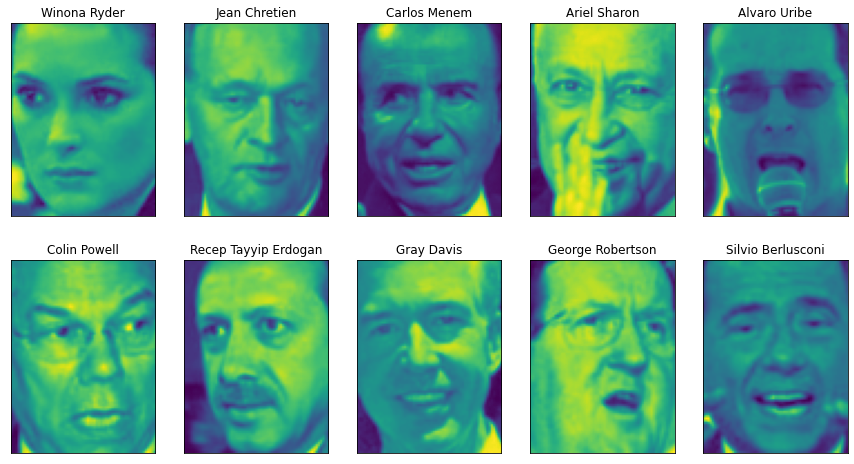

In [11]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [12]:
print('people.images.shape:', people.images.shape)
print('class number:', len(people.target_names))

people.images.shape: (3023, 87, 65)
class number: 62


In [13]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25} {1:3}'.format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [20]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

* 얼굴 인식이라 하면 통상적으로 새로운 얼굴 이미지가 데이터베이스에 있는 기존 얼굴 중 하나에 속하는지 찾는 작업.
* 해결 방법 중 하나는 각 사람을 서로 다른 클래스로 구분하는 분류기를 만드는 것.
* 하지만 보통 얼굴 데이터베이스에는 사람의 수는 많지만 각 사람에 대한 이미지는 적다.
* 대규모 모델을 다시 훈련시키지 않고도 새로운 사람의 얼굴을 쉽게 추가할 수도 있어야 한다.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)

knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn.fit(X_train, y_train)
print('1-knn test set score: {}'.format(knn.score(X_test, y_test)))

1-knn test set score: 0.23255813953488372


* 주성분으로 변환하여 계산하면 정확도가 높아지지 않을까 기대.
* PCA의 화이트닝(whitening, 백색화) 사용해 주성분의 스케일이 같아지도록 조정.
* 화이트닝 옵션 없이 변환한 후에 StandardScaler를 적용하는 것과 같다.

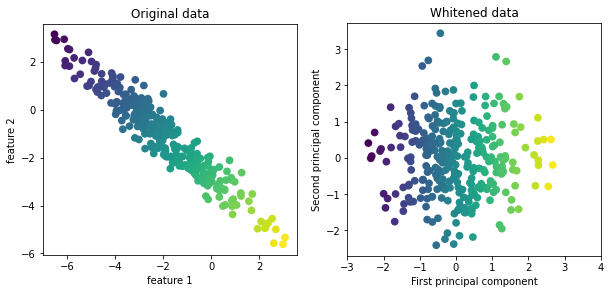

In [21]:
mglearn.plots.plot_pca_whitening()

In [22]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape:', X_train_pca.shape)

X_train_pca.shape: (1547, 100)


In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print('test set acc: {}'.format(knn.score(X_test_pca, y_test)))

test set acc: 0.312015503875969


In [25]:
print('pca.components_.shape:', pca.components_.shape)

pca.components_.shape: (100, 5655)


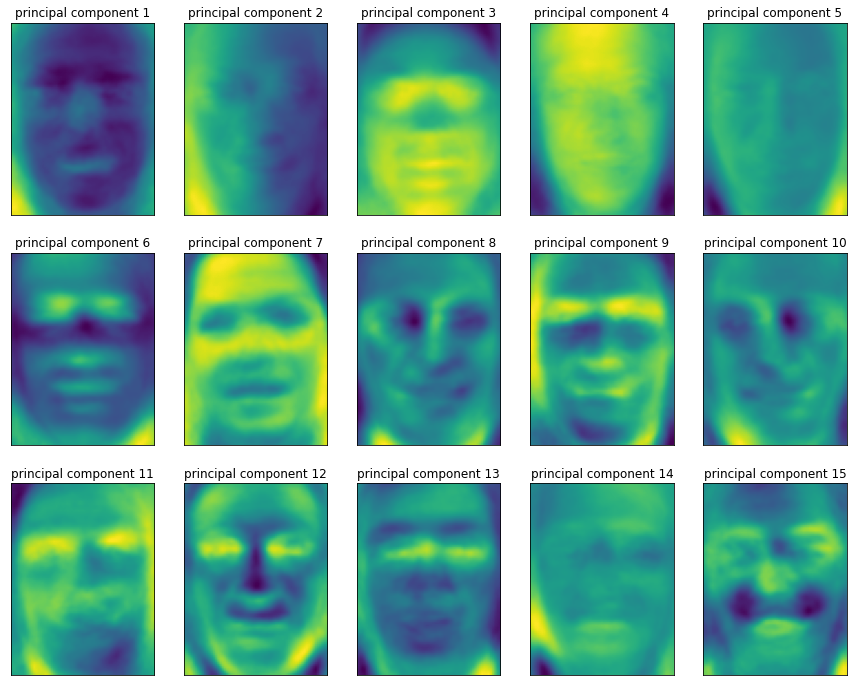

In [26]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('principal component {}'.format((i + 1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 0.7s, 0.0min


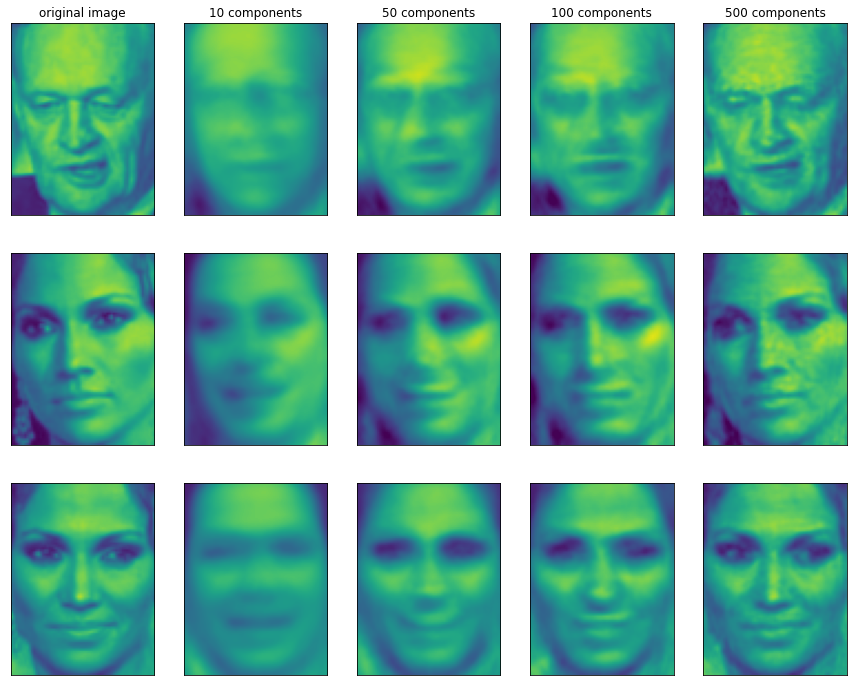

In [27]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'second principal component')

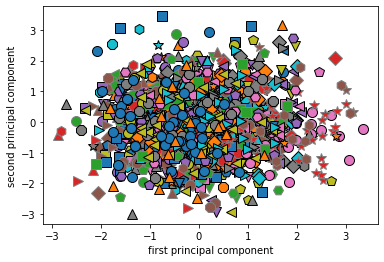

In [28]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('first principal component')
plt.ylabel('second principal component')